## Exploratory Data Analysis with the McDonalds Nutrition Information

In [14]:
#https://www.kaggle.com/datasets/mcdonalds/nutrition-facts?select=menu.csv for csv file

In [15]:
import ibm_db #Library allowing for database operations
import pandas as pd #Library for data analysis
import ibm_db_dbi

In [16]:
#Identitfy the database credentials
dsn_hostname = "hostname.databases.appdomain.cloud" 
dsn_uid = "uid"       
dsn_pwd = "pwd"     

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"           
dsn_port = "port"              
dsn_protocol = "TCPIP"           
dsn_security = "SSL"            

In [17]:
#Create the connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};"
    "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security)

In [ ]:
#Create a connection to the database
try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

In [22]:
#Verify number of rows in loaded table
createstmt=ibm_db.exec_immediate(conn, 'SELECT count(*) FROM MCDONALDS_NUTRITION')
ibm_db.fetch_both(createstmt)

{'1': 260, 0: 260}

In [23]:
pconn=ibm_db_dbi.Connection(conn)
#Load data from the MCDONALDS_NUTRITION table into a data frame
df=pd.read_sql('SELECT * FROM MCDONALDS_NUTRITION', pconn)
#View first 5 rows
df.head()

C:\Users\JoeDe\AppData\Local\Temp\ipykernel_14236\3670407786.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql('SELECT * FROM MCDONALDS_NUTRITION', pconn)


,CATEGORY,ITEM,SERVING_SIZE,CALORIES,CALORIES_FROM_FAT,TOTAL_FAT,TOTAL_FAT____DAILY_VALUE_,SATURATED_FAT,SATURATED_FAT____DAILY_VALUE_,TRANS_FAT,...,CARBOHYDRATES,CARBOHYDRATES____DAILY_VALUE_,DIETARY_FIBER,DIETARY_FIBER____DAILY_VALUE_,SUGARS,PROTEIN,VITAMIN_A____DAILY_VALUE_,VITAMIN_C____DAILY_VALUE_,CALCIUM____DAILY_VALUE_,IRON____DAILY_VALUE_
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [24]:
#View summary statistics
df.describe()

,CALORIES,CALORIES_FROM_FAT,TOTAL_FAT,TOTAL_FAT____DAILY_VALUE_,SATURATED_FAT,SATURATED_FAT____DAILY_VALUE_,TRANS_FAT,CHOLESTEROL,CHOLESTEROL____DAILY_VALUE_,SODIUM,...,CARBOHYDRATES,CARBOHYDRATES____DAILY_VALUE_,DIETARY_FIBER,DIETARY_FIBER____DAILY_VALUE_,SUGARS,PROTEIN,VITAMIN_A____DAILY_VALUE_,VITAMIN_C____DAILY_VALUE_,CALCIUM____DAILY_VALUE_,IRON____DAILY_VALUE_
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


Which food item has maximum sugar content?

In [66]:
#Conduct summary statistics on Sugars
df['SUGARS'].describe()

count    260.000000
mean      29.423077
std       28.679797
min        0.000000
25%        5.750000
50%       17.500000
75%       48.000000
max      128.000000
Name: SUGARS, dtype: float64

In [56]:
#reate a visual representation of each category 
#Create a categorical scatterplot for sugar content
import seaborn as sns
import matplotlib.pyplot as mpl
%matplotlib inline


c:\Users\JoeDe\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\JoeDe\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\JoeDe\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\JoeDe\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, 

Text(0.5, 1.0, 'MCDONALDS NUTRITION: SUGAR CONTENT')

c:\Users\JoeDe\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


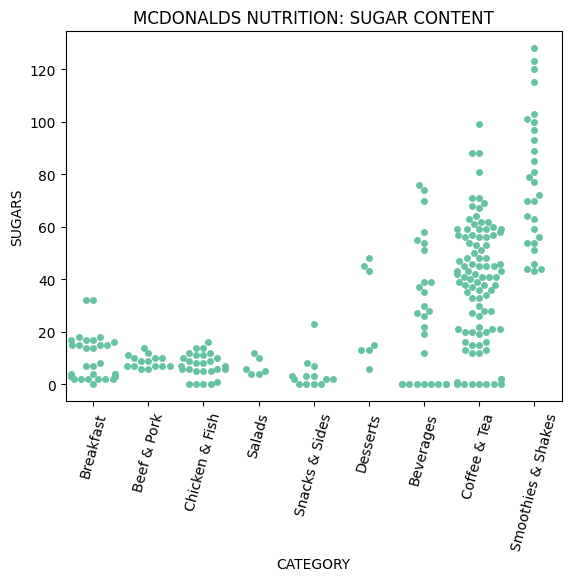

In [ ]:
plot=sns.swarmplot(x='CATEGORY', y='SUGARS', size=5, data=df)
mpl.setp(plot.get_xticklabels(), rotation=75)
mpl.title('MCDONALDS NUTRITION: SUGAR CONTENT')

Now lets find the item with the highest sugar content! We can see that it is in the smoothies and shakes category

In [68]:
#Find the index the item with the maximum sugar content is at
df['SUGARS'].idxmax()

253

The item with the highest sugar is at position 253

In [71]:
df.at[253, 'ITEM']

'McFlurry with M&M’s Candies (Medium)'

Now lets check to see if there are any outliers

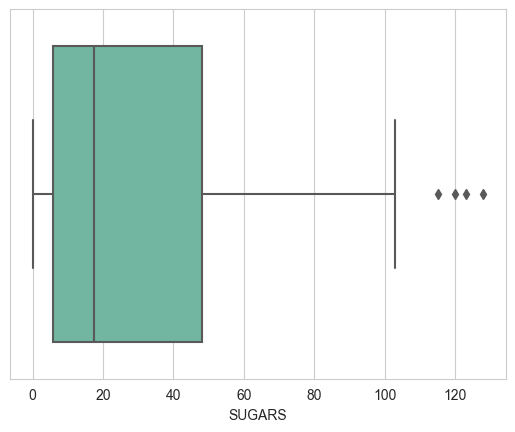

In [75]:
sns.set_style('whitegrid')
bxplot=sns.boxplot(x=df['SUGARS'])

Check if there is a correlation between sugar and total fat of the product

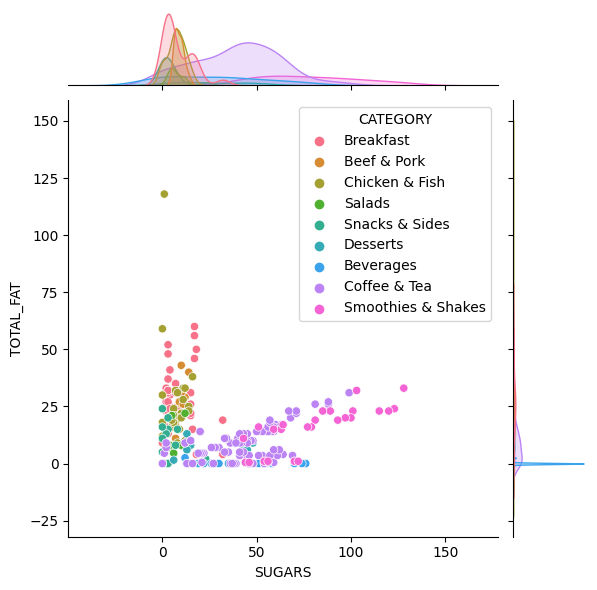

In [74]:
scaplot=sns.jointplot(x='SUGARS', y='TOTAL_FAT', hue='CATEGORY', data=df)

In [76]:
ibm_db.close(conn)

True

### Resources:
https://seaborn.pydata.org/generated/seaborn.jointplot.html

https://seaborn.pydata.org/tutorial/aesthetics.html

https://datagy.io/seaborn-swarmplot/

https://www.geeksforgeeks.org/matplotlib-pyplot-setp-function-in-python/

